In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# train_main.csv - the training set
# train_geo.csv - supplemental information about geographical data for the training set
# train_weather.csv - supplemental information about weather data for the training set
# holidays.csv - supplemental information about the holidays in the city


train_main = pd.read_csv('train_main.csv')
train_geo = pd.read_csv('train_geo.csv')
train_weather = pd.read_csv('train_weather.csv')
holidays = pd.read_csv('holidays.csv')

In [3]:
train_main.shape

(8494, 5)

In [83]:
train_main.head()

,id,starting_time,model_van,num_packages,delivery_time
0,1,2016/04/14 20:53:00,model_A,3,448
1,2,2016/05/30 23:12:00,model_B,1,784
2,3,2016/03/03 11:54:00,model_B,1,844
3,4,2016/05/02 12:34:00,model_A,1,2076
4,5,2016/03/02 15:53:00,model_A,1,1289


In [4]:
train_geo

,id,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude
0,3954,Hawkins,-73.986992,40.755150,-73.946709,40.788689
1,4688,Hawkins,-73.976463,40.739571,-73.983727,40.711330
2,4747,Hawkins,-73.974167,40.763901,-73.987129,40.742100
3,5252,Hawkins,-73.999619,40.733711,-74.002357,40.760651
4,4102,Hawkins,-73.973450,40.795288,-73.941429,40.839375
...,...,...,...,...,...,...
9044,4571,Hawkins,-73.978340,40.752934,-73.999962,40.737942
9045,6919,Hawkins,-73.961594,40.773823,-73.984268,40.770107
9046,5992,Hawkins,-73.994507,40.770317,-73.781120,40.779087
9047,5992,Hawkins,-73.994507,40.770317,-73.781120,40.779087


In [5]:
train_weather

,id,wea_conditions,wea_temp,wea_dptemp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow
0,7322,Mostly_Cloudy,22.8,11.7,49.0,7.4,0,16.1,29.9,NaN,No,No,No
1,5677,Clear,12.8,-2.8,34.0,0.0,0,16.1,29.9,NaN,No,No,No
2,5269,Clear,16.7,-6.7,20.0,5.6,0,16.1,30.3,NaN,No,No,No
3,7334,Overcast,9.4,7.2,86.0,13.0,70,16.1,29.8,0.8,No,No,No
4,3356,Light_Rain,11.7,10.6,93.0,5.6,0,4.0,29.9,1.8,No,Y,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8489,4403,Haze,11.7,8.9,83.0,NaN,0,9.7,29.7,0.3,No,No,No
8490,1073,Clear,10.0,2.8,61.0,25.9,60,16.1,30.1,NaN,No,No,No
8491,2026,Clear,-6.1,-11.1,68.0,7.4,0,16.1,29.9,NaN,No,No,No
8492,7646,Overcast,11.7,-3.9,34.0,16.7,300,16.1,29.8,NaN,No,No,No


In [6]:
holidays

,date,holiday
0,2016-01-01,Y
1,2016-01-18,Y
2,2016-02-12,Y
3,2016-02-15,Y
4,2016-05-08,Y
5,2016-05-30,Y
6,2016-06-19,Y
7,2016-07-04,Y
8,2016-09-05,Y
9,2016-10-10,Y


In [7]:
train_main.id.nunique()

8494

In [8]:
train_geo.id.nunique()

8494

In [9]:
train_weather.id.nunique()

8494

In [12]:
train_geo = train_geo.drop_duplicates('id')
train_weather = train_weather.drop_duplicates('id')

In [13]:
# train_geo with train_weather
df_merged = pd.merge(train_geo,
                      train_weather,
                      left_on = ["id"],
                      right_on = ["id"],
                      how="inner")

In [14]:
df_merged.shape

(8494, 18)

In [38]:
# df_merged with train_main
df = pd.merge(train_main,
              df_merged,
              left_on = ["id"],
              right_on = ["id"],
              how="inner")

In [39]:
df.shape

(8494, 22)

In [40]:
df.head()

,id,starting_time,model_van,num_packages,delivery_time,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,...,wea_dptemp,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow
0,1,2016/04/14 20:53:00,model_A,3,448,Hawkins,-73.950912,40.825974,-73.944740,40.814163,...,0.0,54.0,16.7,170,16.1,30.4,NaN,No,No,No
1,2,2016/05/30 23:12:00,model_B,1,784,Hawkins,-73.985680,40.760487,-73.942482,40.786232,...,18.9,79.0,9.3,0,16.1,30.0,NaN,No,No,No
2,3,2016/03/03 11:54:00,model_B,1,844,Hawkins,-73.985420,40.758389,-74.007294,40.726639,...,-15.6,31.0,9.3,250,16.1,30.2,NaN,No,No,No
3,4,2016/05/02 12:34:00,model_A,1,2076,Hawkins,-73.870964,40.773792,-73.989090,40.746052,...,-1.7,85.0,13.0,300,4.0,30.1,NaN,No,No,No
4,5,2016/03/02 15:53:00,model_A,1,1289,Hawkins,-73.979012,40.745266,-73.979240,40.772480,...,12.2,89.0,11.1,170,1.6,30.0,5.1,No,Y,No


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8494 entries, 0 to 8493
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8494 non-null   int64  
 1   starting_time      8494 non-null   object 
 2   model_van          8494 non-null   object 
 3   num_packages       8494 non-null   int64  
 4   delivery_time      8494 non-null   int64  
 5   town               8494 non-null   object 
 6   start_Longitude    8494 non-null   float64
 7   start_Latitude     8494 non-null   float64
 8   end_Longitude      8494 non-null   float64
 9   end_Latitude       8494 non-null   float64
 10  wea_conditions     8494 non-null   object 
 11  wea_temp           8492 non-null   float64
 12  wea_dptemp         8492 non-null   float64
 13  wea_humidity       8492 non-null   float64
 14  wea_windspeed      7837 non-null   float64
 15  wea_winddir        8494 non-null   int64  
 16  wea_visibility     8265 

In [42]:
df.isnull().sum()

id                      0
starting_time           0
model_van               0
num_packages            0
delivery_time           0
town                    0
start_Longitude         0
start_Latitude          0
end_Longitude           0
end_Latitude            0
wea_conditions          0
wea_temp                2
wea_dptemp              2
wea_humidity            2
wea_windspeed         657
wea_winddir             0
wea_visibility        229
wea_pressure          226
wea_precipitation    7213
wea_fog                 0
wea_rain                0
wea_snow                0
dtype: int64

In [44]:
df['date'] = pd.to_datetime(df.starting_time).dt.date

In [45]:
df.head()

,id,starting_time,model_van,num_packages,delivery_time,town,start_Longitude,start_Latitude,end_Longitude,end_Latitude,...,wea_humidity,wea_windspeed,wea_winddir,wea_visibility,wea_pressure,wea_precipitation,wea_fog,wea_rain,wea_snow,date
0,1,2016/04/14 20:53:00,model_A,3,448,Hawkins,-73.950912,40.825974,-73.944740,40.814163,...,54.0,16.7,170,16.1,30.4,NaN,No,No,No,2016-04-14
1,2,2016/05/30 23:12:00,model_B,1,784,Hawkins,-73.985680,40.760487,-73.942482,40.786232,...,79.0,9.3,0,16.1,30.0,NaN,No,No,No,2016-05-30
2,3,2016/03/03 11:54:00,model_B,1,844,Hawkins,-73.985420,40.758389,-74.007294,40.726639,...,31.0,9.3,250,16.1,30.2,NaN,No,No,No,2016-03-03
3,4,2016/05/02 12:34:00,model_A,1,2076,Hawkins,-73.870964,40.773792,-73.989090,40.746052,...,85.0,13.0,300,4.0,30.1,NaN,No,No,No,2016-05-02
4,5,2016/03/02 15:53:00,model_A,1,1289,Hawkins,-73.979012,40.745266,-73.979240,40.772480,...,89.0,11.1,170,1.6,30.0,5.1,No,Y,No,2016-03-02


In [48]:
#holidays

In [50]:
holidays_list = holidays.date.values
holidays_list

array(['2016-01-01', '2016-01-18', '2016-02-12', '2016-02-15',
       '2016-05-08', '2016-05-30', '2016-06-19', '2016-07-04',
       '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24',
       '2016-12-26'], dtype=object)

In [55]:
holiday = []
for i in df.date.values:
    if str(i) in holidays_list:
        holiday.append('Y')
    else:
        holiday.append('N')

In [56]:
df['holidays'] = holiday

In [57]:
df['holidays'].value_counts()

N    8176
Y     318
Name: holidays, dtype: int64

In [60]:
df.starting_time = pd.to_datetime(df.starting_time)

In [72]:
df.starting_time[0].second

0

In [75]:
minute = [x.minute for x in df.starting_time]
hour = [x.hour for x in df.starting_time]
year = [x.year for x in df.starting_time]
month = [x.month for x in df.starting_time]
day = [x.day for x in df.starting_time]

In [76]:
df['year'] = year
df['month'] = month
df['day'] = day
df['hour'] = hour
df['minute'] = minute

In [77]:
df.columns

Index(['id', 'starting_time', 'model_van', 'num_packages', 'delivery_time',
       'town', 'start_Longitude', 'start_Latitude', 'end_Longitude',
       'end_Latitude', 'wea_conditions', 'wea_temp', 'wea_dptemp',
       'wea_humidity', 'wea_windspeed', 'wea_winddir', 'wea_visibility',
       'wea_pressure', 'wea_precipitation', 'wea_fog', 'wea_rain', 'wea_snow',
       'date', 'holidays', 'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [81]:
ignore_columns = ['id','starting_time','date']
train_df = df.drop(ignore_columns,axis = 1)

In [82]:
train_df.columns

Index(['model_van', 'num_packages', 'delivery_time', 'town', 'start_Longitude',
       'start_Latitude', 'end_Longitude', 'end_Latitude', 'wea_conditions',
       'wea_temp', 'wea_dptemp', 'wea_humidity', 'wea_windspeed',
       'wea_winddir', 'wea_visibility', 'wea_pressure', 'wea_precipitation',
       'wea_fog', 'wea_rain', 'wea_snow', 'holidays', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [84]:
X = train_df.drop('delivery_time' , axis = 1)
y = train_df['delivery_time']

In [86]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y)
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((6370, 25), (6370,), (2124, 25), (2124,))

In [99]:
cat_vars = ['model_van','wea_conditions', 'wea_fog' , 'wea_rain','wea_snow']
num_vars = list(set(X_train.columns) - set(cat_vars))

In [100]:
len(cat_features) + len(num_features)

25

In [101]:
X_train.median()

num_packages            1.000000
start_Longitude       -73.982128
start_Latitude         40.754299
end_Longitude         -73.980217
end_Latitude           40.754820
wea_temp               11.100000
wea_dptemp              3.300000
wea_humidity           55.000000
wea_windspeed           9.300000
wea_winddir             0.000000
wea_visibility         16.100000
wea_pressure           30.000000
wea_precipitation       0.500000
year                 2016.000000
month                   3.000000
day                    15.000000
hour                   14.000000
minute                 53.000000
dtype: float64

In [102]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

In [107]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder

In [110]:
X_train = pd.get_dummies(X_train , drop_first = True)
X_test = pd.get_dummies(X_test , drop_first = True)

In [111]:
X_train.shape , X_test.shape

((6370, 35), (2124, 35))

In [135]:
X_train.columns

Index(['num_packages', 'start_Longitude', 'start_Latitude', 'end_Longitude',
       'end_Latitude', 'wea_temp', 'wea_dptemp', 'wea_humidity',
       'wea_windspeed', 'wea_winddir', 'wea_visibility', 'wea_pressure',
       'wea_precipitation', 'year', 'month', 'day', 'hour', 'minute',
       'model_van_model_B', 'wea_conditions_Haze', 'wea_conditions_Heavy_Rain',
       'wea_conditions_Light_Freezing_Rain', 'wea_conditions_Light_Rain',
       'wea_conditions_Light_Snow', 'wea_conditions_Mostly_Cloudy',
       'wea_conditions_Overcast', 'wea_conditions_Partly_Cloudy',
       'wea_conditions_Rain', 'wea_conditions_Scattered_Clouds',
       'wea_conditions_Snow', 'wea_conditions_Unknown', 'wea_fog_Y',
       'wea_rain_Y', 'wea_snow_Y', 'holidays_Y'],
      dtype='object')

In [137]:
# X_test['wea_conditions_Heavy_Snow']

In [113]:
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [114]:
X_train_std.shape , X_test_std.shape

((6370, 35), (2124, 35))

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_std, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [128]:
from sklearn.metrics import mean_absolute_error , r2_score

In [129]:
y_train.mean() ,y_test.mean()

(766.1718995290424, 779.1483050847457)

In [130]:
y_train_pred = regr.predict(X_train_std)
y_test_pred = regr.predict(X_test_std)

In [122]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(352.9269226959425, 354.826111156318)

In [131]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(352.9269226959425, 354.8172959978886)

In [125]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(0.213396223872649, 0.24575339417841457)

In [132]:
import pickle
# now you can save it to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(regr, f)

In [138]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth' : [2,4,8,16,32],
    'n_estimators' : [50,100,200,500,1000]
    }

from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(RandomForestRegressor(), param_grid)
clf.fit(X_train_std,y_train)
clf.score(X_train_std,y_train)


0.9500683232113993

In [139]:
clf.best_estimator_

RandomForestRegressor(max_depth=32, n_estimators=1000)

In [192]:
model = RandomForestRegressor(max_depth= 32, n_estimators=1000)
model.fit(X_train_std , y_train)

RandomForestRegressor(max_depth=32, n_estimators=1000)

In [193]:
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

In [194]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(84.04918336444626, 227.15014169885941)

In [226]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(-0.024459340596189705, -0.030744698003219106)

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_std , y_train)

In [170]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [171]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(364.7051671335574, 372.61041886599793)

In [172]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(0.1438703172314002, 0.14983984006870754)

In [219]:
from sklearn.svm import SVR
lr = SVR(kernel = 'rbf').fit(X_train_std , y_train)

In [220]:
y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

In [221]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(376.7908999289267, 387.3471376467186)

In [222]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(-0.03364197540760716, -0.04014830107461287)

In [ ]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

In [223]:
### saving best random forest model

model

RandomForestRegressor(max_depth=32, n_estimators=1000)

In [224]:
import pickle
# now you can save it to a file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(regr, f)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

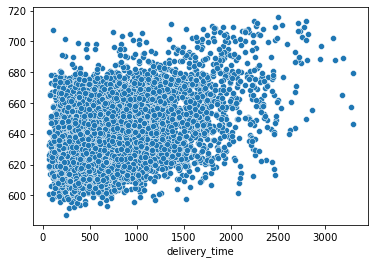

In [231]:
sns.scatterplot(y_train , y_train_pred)

C:\Users\shubh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

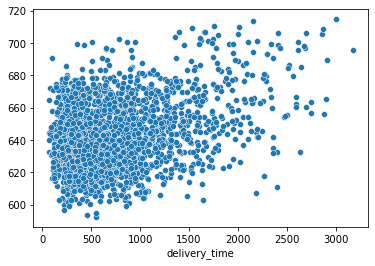

In [232]:
sns.scatterplot(y_test , y_test_pred)

<AxesSubplot:>

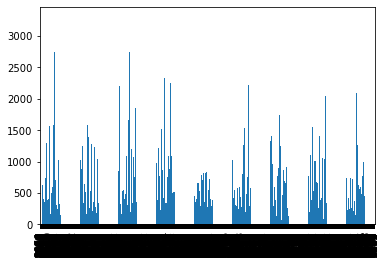

In [234]:
pd.Series(y_train).plot(kind = 'bar')

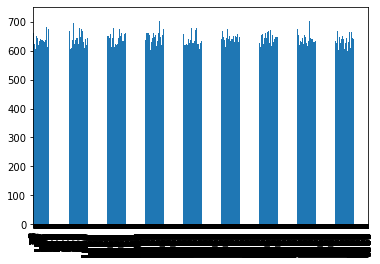

In [235]:
pd.Series(y_train_pred).plot(kind = 'bar');

In [236]:
import tensorflow as tf

In [238]:
# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr = 0.001), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_2.fit(X_train_std, y_train, epochs= 100 , validation_data= ( X_test_std,y_test))

Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 757.8394 - mae: 757.8394 - val_loss: 741.4164 - val_mae: 741.4164
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 602.2415 - mae: 602.2415 - val_loss: 453.1097 - val_mae: 453.1097
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 381.5692 - mae: 381.5692 - val_loss: 366.9093 - val_mae: 366.9093
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 358.3902 - mae: 358.3902 - val_loss: 366.6348 - val_mae: 366.6348
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 357.8136 - mae: 357.8136 - val_loss: 364.8157 - val_mae: 364.8157
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 357.4583 - mae: 357.4583 - val_loss: 364.9555 - val_mae: 364.9555
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 357.1128 - mae: 357.1128 - val_loss: 365.6606 - val_mae: 365.6606
Epoch 8/100
2

Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 357.0784 - mae: 357.0784 - val_loss: 365.7417 - val_mae: 365.7417
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 357.0757 - mae: 357.0757 - val_loss: 364.8375 - val_mae: 364.8375
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 356.7578 - mae: 356.7578 - val_loss: 364.7530 - val_mae: 364.7530
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 356.9142 - mae: 356.9142 - val_loss: 364.7292 - val_mae: 364.7292
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 356.8257 - mae: 356.8257 - val_loss: 366.1125 - val_mae: 366.1125
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 356.7674 - mae: 356.7674 - val_loss: 365.4890 - val_mae: 365.4890
Epoch 65/100
200/200 [==============================] - 0s 2ms/step - loss: 357.0953 - mae: 357.0953 - val_loss: 364.3084 - val_mae: 364.3084
Epoch 

In [239]:
y_train_pred = insurance_model_2.predict(X_train_std)
y_test_pred = insurance_model_2.predict(X_test_std)

In [240]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(355.5685239687071, 365.1365342077338)

In [241]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(0.1027076256548719, 0.11134981987406778)

In [246]:
#det_coeff

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(lr = 0.001), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train_std, y_train, epochs= 30 , validation_data= ( X_test_std,y_test))

Epoch 1/30
200/200 [==============================] - 0s 2ms/step - loss: 831879.1250 - mae: 758.6870 - val_loss: 820701.8750 - val_mae: 744.8137
Epoch 2/30
200/200 [==============================] - 0s 2ms/step - loss: 628961.0000 - mae: 631.5613 - val_loss: 442598.9062 - val_mae: 495.8969
Epoch 3/30
200/200 [==============================] - 0s 2ms/step - loss: 300085.9375 - mae: 396.3625 - val_loss: 245865.1562 - val_mae: 365.1697
Epoch 4/30
200/200 [==============================] - 0s 2ms/step - loss: 226236.9844 - mae: 361.3278 - val_loss: 238818.7500 - val_mae: 372.4732
Epoch 5/30
200/200 [==============================] - 0s 2ms/step - loss: 224269.1562 - mae: 366.7396 - val_loss: 237105.6562 - val_mae: 372.1224
Epoch 6/30
200/200 [==============================] - 0s 2ms/step - loss: 223939.6719 - mae: 366.5306 - val_loss: 236386.4375 - val_mae: 370.5103
Epoch 7/30
200/200 [==============================] - 0s 2ms/step - loss: 223998.5781 - mae: 366.2610 - val_loss: 236816.062

In [247]:
y_train_pred = insurance_model_3.predict(X_train_std)
y_test_pred = insurance_model_3.predict(X_test_std)

In [248]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(363.95610215023885, 371.87989689311513)

In [249]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(0.1428660246111586, 0.14845534885117562)

In [272]:
#det_coeff

# Set random seed
tf.random.set_seed(42)

# Add an extra layer and increase number of units
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(16), # 100 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(lr = 0.005), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
history = insurance_model_3.fit(X_train, y_train, epochs= 100 , validation_data= ( X_test,y_test))

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 [==============================] - 0s 2ms/step - loss: 262003.3438 - mae: 396.5545 - val_loss: 278838.0938 - val_mae: 402.4327
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 261385.9688 - mae: 397.0125 - val_loss: 279277.9688 - val_mae: 413.4690
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 261063.0781 - mae: 396.6932 - val_loss: 282800.2812 - val_mae: 395.5461
Epoch 4/100
200/200 [==============================] - 0s 1ms/step 

200/200 [==============================] - 0s 1ms/step - loss: 258326.2500 - mae: 392.7509 - val_loss: 279222.9062 - val_mae: 412.0276
Epoch 52/100
200/200 [==============================] - 0s 1ms/step - loss: 258506.0938 - mae: 394.2285 - val_loss: 278933.4688 - val_mae: 410.9369
Epoch 53/100
200/200 [==============================] - 0s 1ms/step - loss: 258886.8281 - mae: 394.6012 - val_loss: 279714.8750 - val_mae: 400.5631
Epoch 54/100
200/200 [==============================] - 0s 1ms/step - loss: 258736.9062 - mae: 394.1453 - val_loss: 278873.9062 - val_mae: 403.6054
Epoch 55/100
200/200 [==============================] - 0s 891us/step - loss: 258616.0625 - mae: 394.3802 - val_loss: 280991.3438 - val_mae: 397.8279
Epoch 56/100
200/200 [==============================] - 0s 1ms/step - loss: 259374.6406 - mae: 394.0341 - val_loss: 280846.7500 - val_mae: 397.9259
Epoch 57/100
200/200 [==============================] - 0s 1ms/step - loss: 258649.9219 - mae: 393.4883 - val_loss: 279705.

In [269]:
y_train_pred = insurance_model_3.predict(X_train_std)
y_test_pred = insurance_model_3.predict(X_test_std)

In [270]:
mean_absolute_error(y_train,y_train_pred) , mean_absolute_error(y_test,y_test_pred)

(434.17203744142734, 445.60191585698817)

In [271]:
r2_score(y_train,y_train_pred) , r2_score(y_test,y_test_pred)

(-0.487215568300049, -0.47597530112833053)